So, as part of the task you need to process your data -- not least resizing it to be uniform in shape. 

You'll follow these steps:

1.   Explore the Example Data of Cats and Dogs
2.   Build and Train a Neural Network to recognize the difference between the two
3.   Evaluate the Training and Validation accuracy

In [1]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import zipfile
import os
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#https://matplotlib.org/users/image_tutorial.html
%matplotlib inline

In [2]:
 #https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
local_file="cats_and_dogs_filtered.zip" 
zip_ref=zipfile.ZipFile(local_file,'r')
zip_ref.extractall("")
zip_ref.close()

In [3]:
train_dogs_dir="cats_and_dogs_filtered/train/dogs/"
train_cats_dir="cats_and_dogs_filtered/train/cats/"

validation_dogs_dir="cats_and_dogs_filtered/validation/dogs"
validation_cats_dir="cats_and_dogs_filtered/validation/cats"

train_dogs_names=os.listdir(train_dogs_dir)
train_cats_names=os.listdir(train_cats_dir)

validation_dogs_names=os.listdir(validation_dogs_dir)
validation_cats_names=os.listdir(validation_cats_dir)

# Dataset Details

In [4]:
print("Dogs train images",len(train_dogs_names))
print("Cats train images",len(train_cats_names))
print("Dogs validation images",len(validation_dogs_names))
print("Cats validation images",len(validation_cats_names))

Dogs train images 1000
Cats train images 1000
Dogs validation images 500
Cats validation images 500


# Plotting Data



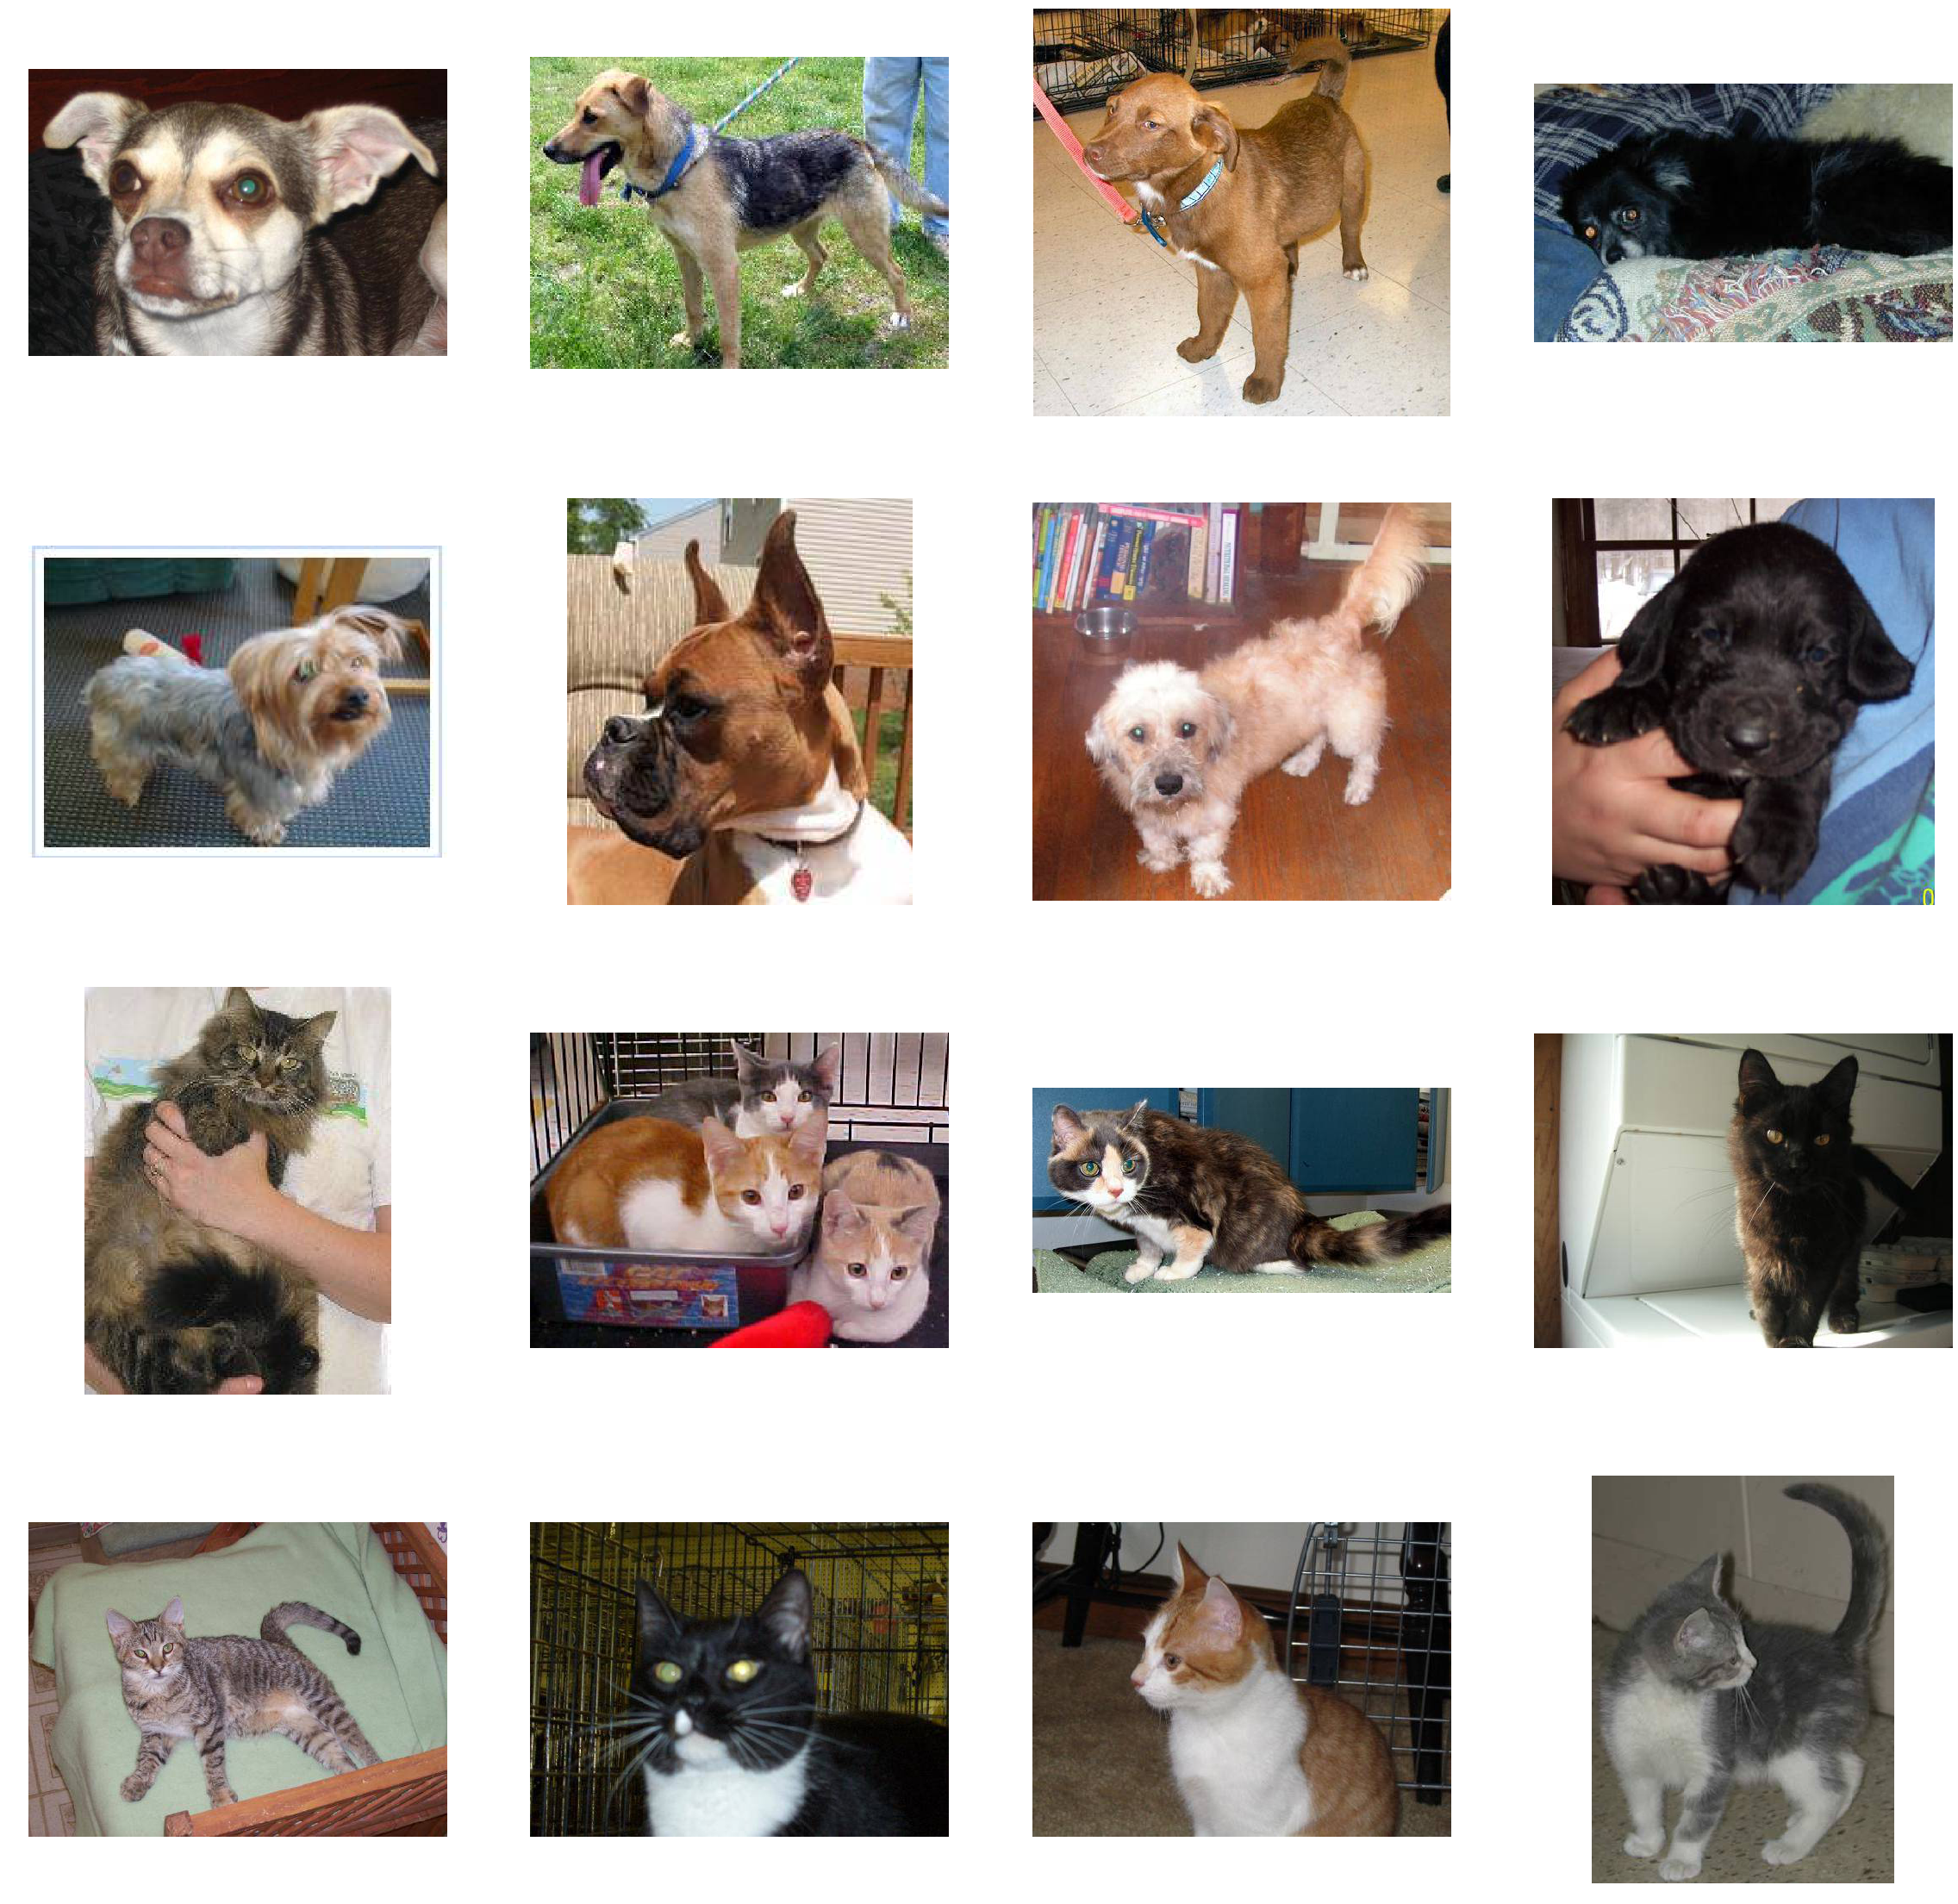

In [18]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 10, nrows * 10)

pic_index += 8
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_names[pic_index-8:pic_index]]
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dog_pix+next_cat_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [14]:
model=tf.keras.models.Sequential([
                                #First Convolutional Layers
                                tf.keras.layers.Conv2D(16,(2,2),activation='relu',input_shape=(150,150,3)),
                                tf.keras.layers.MaxPooling2D(2,2),
                                 
                                #Second Convolutional Layers
                                tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
                                tf.keras.layers.MaxPooling2D(2,2),

                                #Fourth Convolutional Layers
                                tf.keras.layers.Conv2D(128,(2,2),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
    
                                tf.keras.layers.Flatten(),
        
                                tf.keras.layers.Dense(512,activation='relu'),
                                tf.keras.layers.Dense(1,activation='softmax')
                                 
                                 ])

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [20]:
train_datagen=ImageDataGenerator(rescale=1/255.)
train_generator=train_datagen.flow_from_directory('cats_and_dogs_filtered/train/',
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')
                                                

validation_datagen=ImageDataGenerator(rescale=1/255.)
validation_generator=validation_datagen.flow_from_directory('cats_and_dogs_filtered/validation/',
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Two version of model generator 

In [ ]:
history=model.fit_generator(
                train_generator,
                steps_per_epoch=50,
                epochs=15,
                verbose=2,
                validation_data=validation_generator,
                validation_steps=25)

In [24]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=2,
                              validation_data=validation_generator)

Epoch 1/5
100/100 - 48s - loss: 7.6666 - acc: 0.5000 - val_loss: 7.6666 - val_acc: 0.5000
Epoch 2/5
100/100 - 45s - loss: 7.6666 - acc: 0.5000 - val_loss: 7.6666 - val_acc: 0.5000
Epoch 3/5
100/100 - 48s - loss: 7.6666 - acc: 0.5000 - val_loss: 7.6666 - val_acc: 0.5000
Epoch 4/5
100/100 - 50s - loss: 7.6666 - acc: 0.5000 - val_loss: 7.6666 - val_acc: 0.5000
Epoch 5/5
100/100 - 48s - loss: 7.6666 - acc: 0.5000 - val_loss: 7.6666 - val_acc: 0.5000


Text(0.5, 1.0, 'Training and validation loss')

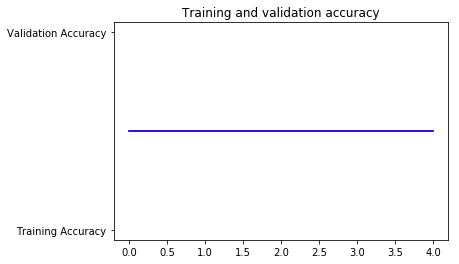

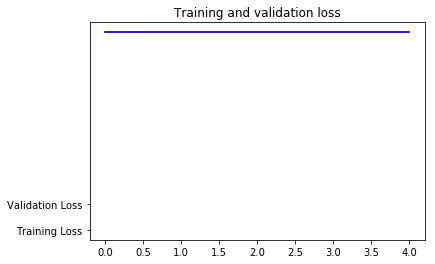

In [25]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)